In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('data/train.csv')

### Apply Transformations on features before Bivariate

In [79]:
def trans_features(df):
    
    # drop irrelevant features
    drop_list = pd.read_excel('data/old_features_ames.xlsx', usecols="A,D").dropna()['Feature'].tolist()
    df.drop(columns=drop_list, inplace=True)
    
    
    # fill missing values
    ofdf = pd.read_excel('data/old_features_ames.xlsx', usecols="A,B,C,F")
    ofdf = ofdf[~ofdf['Feature'].isin(drop_list)]
    ofdf.dropna(inplace=True) #only target 'SalePrice' has NaN for 'Missing Handle'
    median_list = ofdf[ofdf['Missing Handle']=='median']['Feature'].tolist()
    mode_list = ofdf[ofdf['Missing Handle']=='mode']['Feature'].tolist()
    
    for med in median_list:
        df[med].fillna(df[med].median(), inplace=True)
    
    for mod in mode_list:
        df[mod].fillna(df[mod].mode()[0], inplace=True)
    
    cusdf = pd.read_excel('data/old_features_ames.xlsx', usecols="A,G")
    cusdf.dropna(inplace=True)
    for index, row in cusdf.iterrows():
        df[row['Feature']].fillna(row['Missing Custom'], inplace=True)
    
    
    # transformations
    log_list = ['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']
    for logf in log_list:
        df[logf] = df[logf].apply(lambda x: np.log(x+1))
    
    mssubclass_mapper = {
        20 : 'mssub1',
        30 : 'mssub2',
        40 : 'mssub3',
        45 : 'mssub4',
        50 : 'mssub5',
        60 : 'mssub6',
        70 : 'mssub7',
        75 : 'mssub8',
        80 : 'mssub9',
        85 : 'mssub10',
        90 : 'mssub11',
        120 : 'mssub12',
        150 : 'mssub13',
        160 : 'mssub14',
        180 : 'mssub15',
        190 : 'mssub16'
    }
    
    df['MSSubClass'].replace(mssubclass_mapper, inplace=True)
    #df['MoSold'].replace(mosold_mapper, inplace=True)
    
    df['GarageYrBlt'] = df['GarageYrBlt'] - 1890
    df['YearBuilt'] = df['YearBuilt'] - 1850
    df['YearRemodAdd'] = df['YearRemodAdd'] - 1940
    
    def change_categories(x, cat_dict):
        if x in cat_dict.keys():
            return cat_dict[x]
        elif 'rare_cat_name' in cat_dict.keys():
            return cat_dict['rare_cat_name']
        else:
            return 'others'
    
    
    df['MSZoning'] = df['MSZoning'].apply(lambda x: change_categories(x, {'RL':'RL','FV':'FV'}))
    df['LotShape'] = df['LotShape'].apply(lambda x: change_categories(x, {'Reg':'Reg','rare_cat_name':'Irreg'}))
    df['LandContour'] = df['LandContour'].apply(lambda x: change_categories(x, {'Lvl':'Lvl','Bnk':'Bnk'}))
    df['LotConfig'] = df['LotConfig'].apply(lambda x: change_categories(x, {'Inside':'Inside','FR2':'FR2','Corner':'Corner','rare_cat_name':'CulDFR3'}))
    df['Neighborhood'] = df['Neighborhood'].apply(lambda x: change_categories(x, {'Blmngtn': 'nhood2',  'Blueste': 'nhood3',  'BrDale': 'nhood3',  'BrkSide': 'nhood3',  'ClearCr': 'nhood2',  'CollgCr': 'nhood2',  'Crawfor': 'nhood2',  'Edwards': 'nhood3',  'Gilbert': 'nhood2',  'IDOTRR': 'nhood3',  'MeadowV': 'nhood3',  'Mitchel': 'nhood3',  'NAmes': 'nhood3',  'NPkVill': 'nhood3',  'NWAmes': 'nhood2',  'NoRidge': 'nhood1',  'NridgHt': 'nhood1',  'OldTown': 'nhood3',  'SWISU': 'nhood3',  'Sawyer': 'nhood3',  'SawyerW': 'nhood2',  'Somerst': 'nhood2',  'StoneBr': 'nhood1',  'Timber': 'nhood2',  'Veenker': 'nhood2'}))
    df['Exterior1st'] = df['Exterior1st'].apply(lambda x: change_categories(x, {'AsbShng': 'Ext1_low',  'AsphShn': 'Ext1_low',  'BrkComm': 'Ext1_low',  'BrkFace': 'Ext1_low',  'CBlock': 'Ext1_low',  'CemntBd': 'Ext1_high',  'HdBoard': 'Ext1_low',  'ImStucc': 'Ext1_high',  'MetalSd': 'Ext1_low',  'Plywood': 'Ext1_low',  'Stone': 'Ext1_high',  'Stucco': 'Ext1_low',  'VinylSd': 'Ext1_high',  'Wd Sdng': 'Ext1_low',  'WdShing': 'Ext1_low'}))
    df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: change_categories(x, {'AsbShng': 'Ext2_low',  'AsphShn': 'Ext2_low',  'Brk Cmn': 'Ext2_low',  'BrkFace': 'Ext2_low',  'CBlock': 'Ext2_low',  'CmentBd': 'Ext2_high',  'HdBoard': 'Ext2_low',  'ImStucc': 'Ext2_high',  'MetalSd': 'Ext2_low',  'Other': 'Ext2_high',  'Plywood': 'Ext2_low',  'Stone': 'Ext2_low',  'Stucco': 'Ext2_low',  'VinylSd': 'Ext2_high',  'Wd Sdng': 'Ext2_low',  'Wd Shng': 'Ext2_low'}))
    df['BldgType'] = df['BldgType'].apply(lambda x: change_categories(x, {'1Fam':'1Fam','TwnhsE':'TwnhsE'}))
    df['HouseStyle'] = df['HouseStyle'].apply(lambda x: change_categories(x, {'1Story':'1Story','1.5Fin':'1.5Fin','2Story':'2Level','2.5Fin':'2Level','rare_cat_name':'other_style'}))
    df['RoofStyle'] = df['RoofStyle'].apply(lambda x: change_categories(x, {'Hip':'Hip','Shed':'Hip','rare_cat_name':'Gable'}))
    df['MasVnrType'] = df['MasVnrType'].apply(lambda x: change_categories(x, {'BrkFace':'Brick','None':'None','BrkCmn':'Brick','Stone':'Stone'}))
    df['ExterQual'] = df['ExterQual'].apply(lambda x: change_categories(x, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))
    #df['ExterCond'] = df['ExterCond'].apply(lambda x: change_categories(x, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))
    df['Foundation'] = df['Foundation'].apply(lambda x: change_categories(x, {'PConc':'PConc','Wood':'PConc','CBlock':'CBlock','Stone':'CBlock','BrkTil':'BrkTil','Slab':'BrkTil'}))
    df['BsmtQual'] = df['BsmtQual'].apply(lambda x: change_categories(x, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))
    df['HeatingQC'] = df['HeatingQC'].apply(lambda x: change_categories(x, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))
    df['Electrical'] = df['Electrical'].apply(lambda x: change_categories(x, {'SBrkr':'SBrkr','rare_cat_name':'FuseBox'}))
    df['KitchenQual'] = df['KitchenQual'].apply(lambda x: change_categories(x, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))
    df['FireplaceQu'] = df['FireplaceQu'].apply(lambda x: change_categories(x, {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}))
    df['GarageType'] = df['GarageType'].apply(lambda x: change_categories(x, {'Attchd':'Attchd','BuiltIn':'BuiltIn','Detchd':'Detchd','Basment':'Detchd','2Types':'Detchd','NoGarage':'NoGarage','CarPort':'NoGarage'}))
    #df['Fence'] = df['Fence'].apply(lambda x: change_categories(x, {'NoFence':'NoFence','GdPrv':'NoFence','rare_cat_name':'MnPrv'}))
    df['SaleType'] = df['SaleType'].apply(lambda x: change_categories(x, {'New':'New','Con':'New','rare_cat_name':'WD'}))
    df['SaleCondition'] = df['SaleCondition'].apply(lambda x: change_categories(x, {'Normal':'Normal','Partial':'Partial','rare_cat_name':'Abnormal'}))
    
    return df

In [10]:
df = trans_features(df)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,BldgType,...,GarageFinish,GarageCars,GarageArea,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,mssub6,RL,4.189655,9.042040,NoAlley,Reg,Lvl,Inside,nhood2,1Fam,...,RFn,2,548,Y,MnPrv,february,2008,WD,Normal,208500
1,mssub1,RL,4.394449,9.169623,NoAlley,Reg,Lvl,FR2,nhood2,1Fam,...,RFn,2,460,Y,MnPrv,may,2007,WD,Normal,181500
2,mssub6,RL,4.234107,9.328212,NoAlley,Irreg,Lvl,Inside,nhood2,1Fam,...,RFn,2,608,Y,MnPrv,september,2008,WD,Normal,223500
3,mssub7,RL,4.110874,9.164401,NoAlley,Irreg,Lvl,Corner,nhood2,1Fam,...,Unf,3,642,Y,MnPrv,february,2006,WD,Abnormal,140000
4,mssub6,RL,4.442651,9.565284,NoAlley,Irreg,Lvl,FR2,nhood1,1Fam,...,RFn,3,836,Y,MnPrv,december,2008,WD,Normal,250000


In [12]:
df['SalePrice'] = df['SalePrice'].apply(lambda x: np.log(x+1))

In [32]:
# list of numerical features that should be verified with anova test, generally ordinal features.
anova_list = []

In [13]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
len(num_columns)

29

### Bivariate analysis of numerical features.

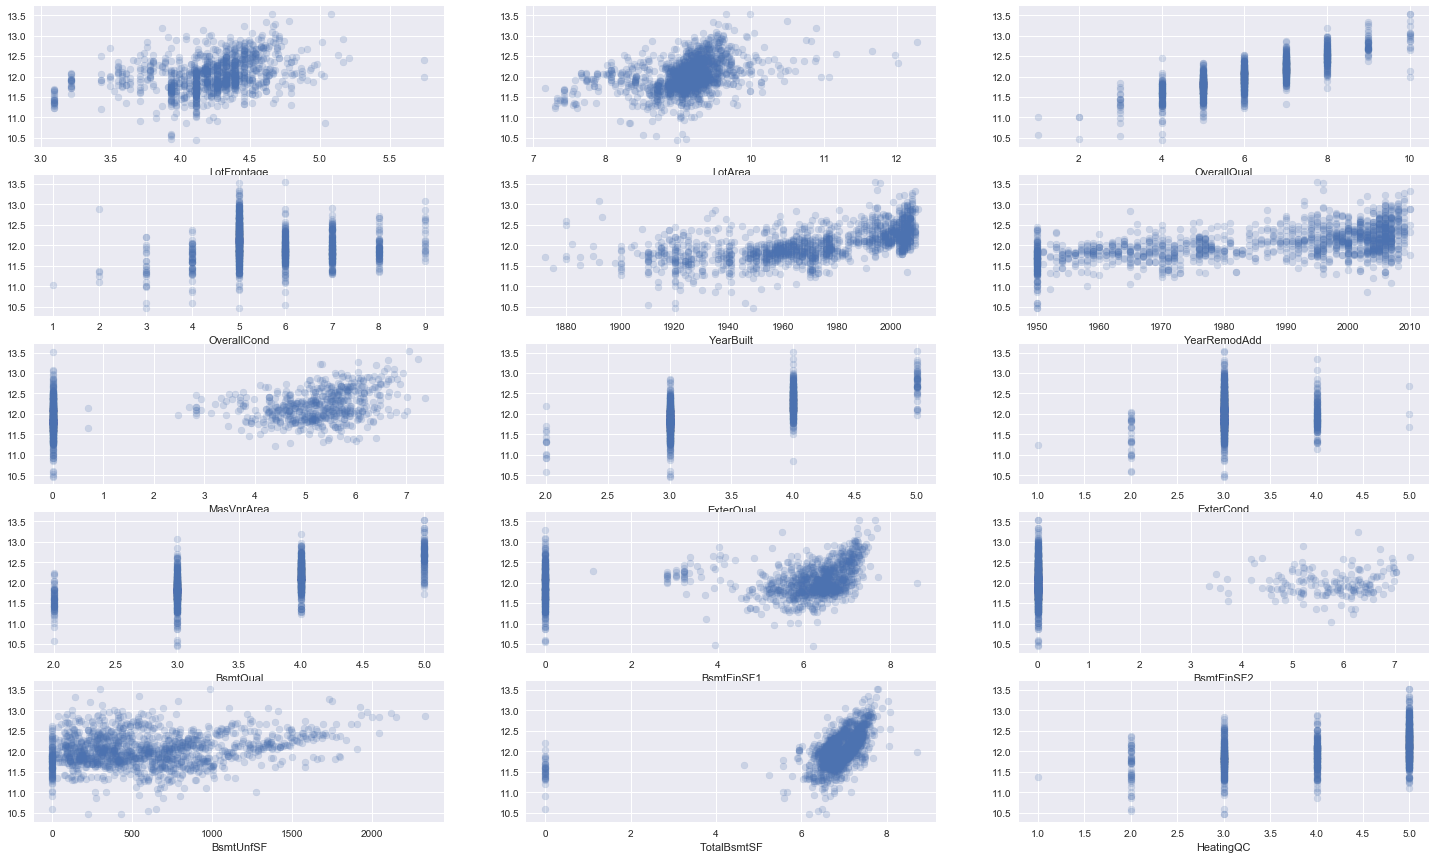

In [8]:
fig = plt.figure(figsize=(25,15))

for i in range(1,16):
    ax = fig.add_subplot(5,3,i)
    plt.scatter(df[num_columns[i-1]], df['SalePrice'], alpha=0.2)
    ax.set_xlabel(num_columns[i-1])

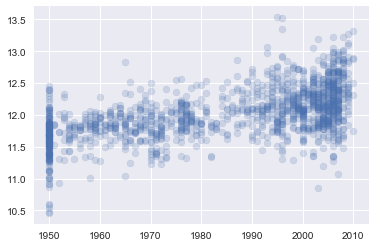

In [22]:
plt.scatter(df['YearRemodAdd'], df['SalePrice'], alpha=0.2)

In [13]:
df['YearBuilt'].min(), df['YearBuilt'].max()

(1872, 2010)

In [14]:
df['YearRemodAdd'].min(), df['YearRemodAdd'].max()

(1950, 2010)

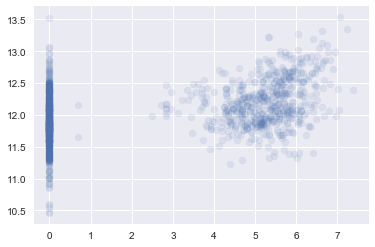

In [17]:
plt.scatter(df['MasVnrArea'], df['SalePrice'], alpha=0.1)

In [18]:
(df['MasVnrArea'] == 0).sum()/1460

0.5952054794520548

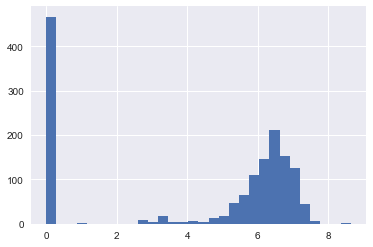

In [22]:
df['BsmtFinSF1'].hist(bins=30)

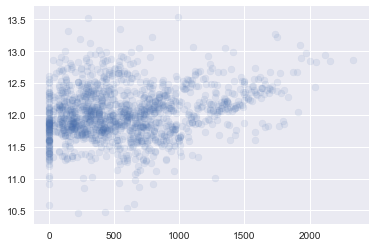

In [25]:
plt.scatter(df['BsmtUnfSF'], df['SalePrice'], alpha=0.1)

In [33]:
anova_list.extend(['OverallCond','ExterCond','HeatingQC'])

Drop MasVnrArea. No 'Masonary Veener' is already covered in MasVnrType. If MasVnrType is also dropped then check if binary for 'Masonary Veener' is useful or not.  
Drop BsmtFinSF1, BsmtFinSF2, BsmtUnfSF.

In [23]:
num_columns[11]

'HeatingQC'

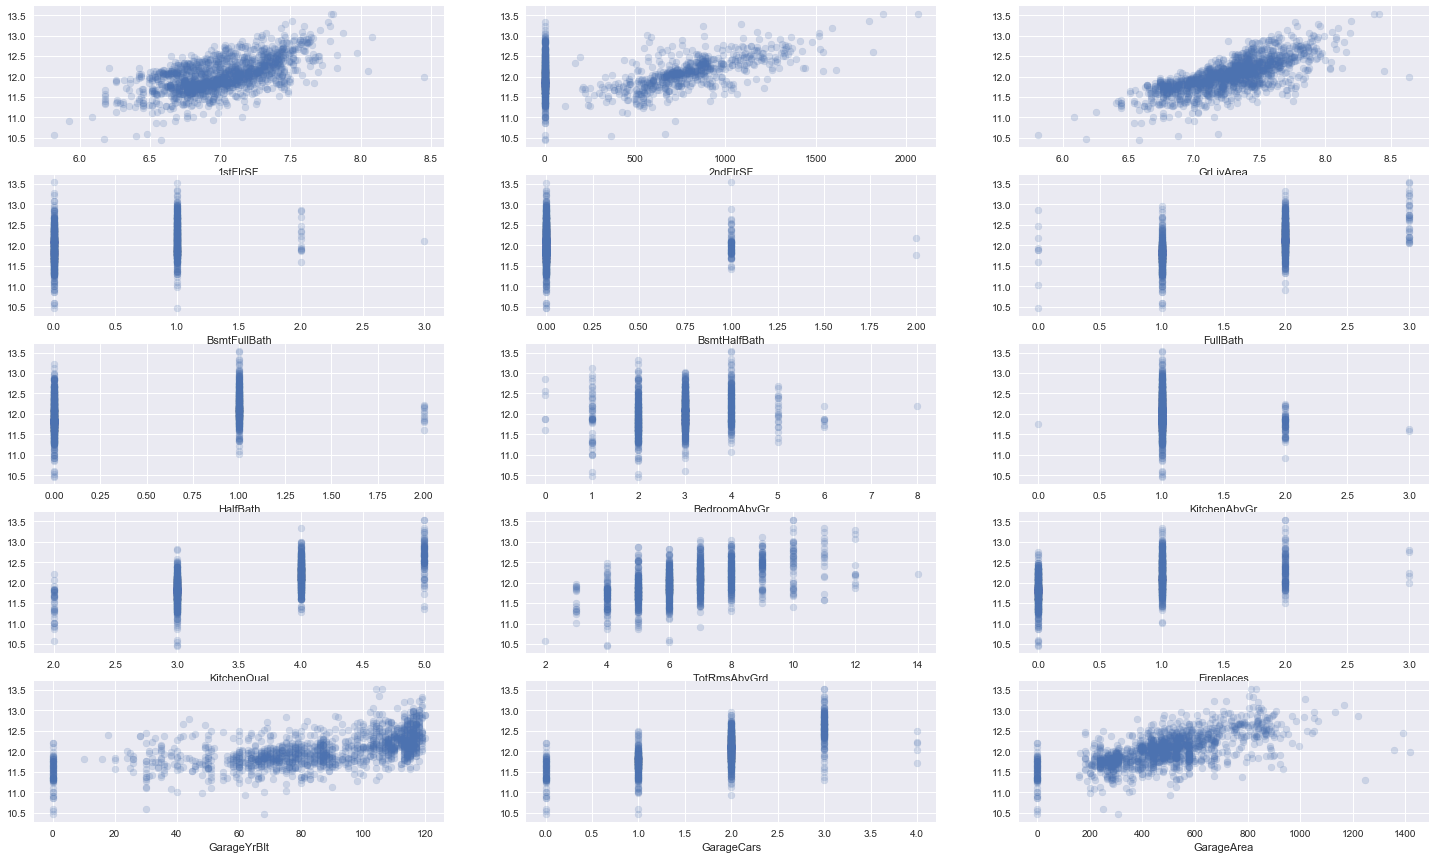

In [24]:
fig = plt.figure(figsize=(25,15))

for i in range(1,16):
    ax = fig.add_subplot(5,3,i)
    plt.scatter(df[num_columns[i+11]], df['SalePrice'], alpha=0.2)
    ax.set_xlabel(num_columns[i+11])

In [26]:
(df['2ndFlrSF'] == 0).sum()/1460

0.5678082191780822

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


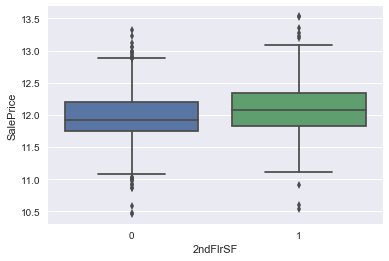

In [31]:
sns.boxplot(df['2ndFlrSF'].apply(lambda x: x if x==0 else 1), df['SalePrice'])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


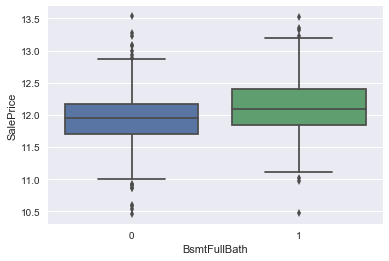

In [35]:
sns.boxplot(df['BsmtFullBath'].apply(lambda x: x if x==0 else 1), df['SalePrice'])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


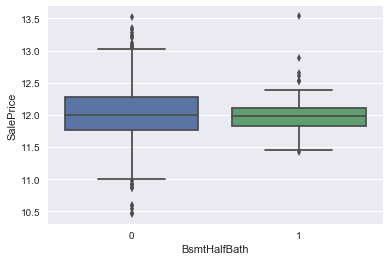

In [36]:
sns.boxplot(df['BsmtHalfBath'].apply(lambda x: x if x==0 else 1), df['SalePrice'])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


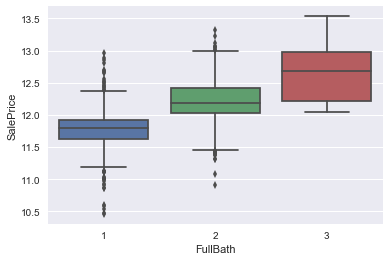

In [41]:
sns.boxplot(df['FullBath'].apply(lambda x: 1 if x<=1 else x), df['SalePrice'])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


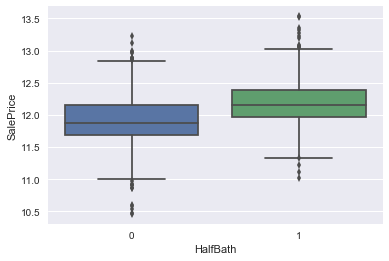

In [43]:
sns.boxplot(df['HalfBath'].apply(lambda x: 0 if x==0 else 1), df['SalePrice'])

In [44]:
anova_list.extend(['BsmtHalfBath','BedroomAbvGr','KitchenAbvGr'])

Check model performance with or without 2ndFlrSF. It has a tricky relationship with target.  
Drop 2ndFlrSF, 

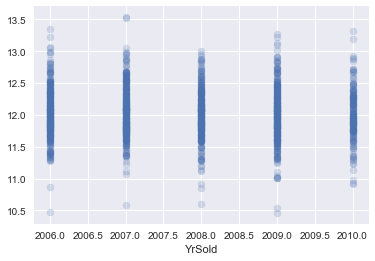

In [49]:
plt.scatter(df[num_columns[27]], df['SalePrice'], alpha=0.2)
plt.xlabel(num_columns[27])

In [51]:
anova_list.extend(['YrSold'])

In [52]:
df['YrSold'].value_counts()/1460

2009    0.231507
2007    0.225342
2006    0.215068
2008    0.208219
2010    0.119863
Name: YrSold, dtype: float64

In [53]:
len(anova_list)

7

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [67]:
def anova_result(feat, target, df):
    df_lm = ols(target + ' ~ ' + feat, data=df).fit()
    result = sm.stats.anova_lm(df_lm, typ=2) # return result in dataframe
    return result.loc[feat,'PR(>F)']

In [68]:
for feat in anova_list:
    result = anova_result(feat, 'SalePrice', df)
    if result >= 0.05:
        print(feat)

OverallCond
ExterCond
BsmtHalfBath
YrSold


Drop all these features (after verifying their scatter plots).

In [70]:
cat_list = df.select_dtypes(exclude=np.number).columns.tolist()
len(cat_list)

26

In [72]:
for feat in cat_list:
    result = anova_result(feat, 'SalePrice', df)
    if result >= 0.05:
        print(feat)

Fence
MoSold


In [76]:
for feat in cat_list:
    result = anova_result(feat, 'SalePrice', df)
    print(feat + ": " + str(result))

MSSubClass: 5.097263862147157e-115
MSZoning: 1.3881131265594685e-56
Alley: 1.3581271402726768e-09
LotShape: 1.3042442347022288e-29
LandContour: 2.2369319027761693e-08
LotConfig: 1.6922754727744825e-07
Neighborhood: 2.0179409124700273e-224
BldgType: 1.3513742289750024e-13
HouseStyle: 3.81337590658827e-30
RoofStyle: 1.153193800288741e-14
Exterior1st: 4.9172210463277436e-49
Exterior2nd: 3.742317559821151e-50
MasVnrType: 2.436537800270569e-64
Foundation: 1.3632317797193265e-113
BsmtExposure: 2.590393703962656e-47
BsmtFinType1: 4.320808568643074e-78
CentralAir: 9.85987751017522e-44
Electrical: 8.903226531721535e-33
FireplaceQu: 6.961918246526399e-115
GarageType: 4.119127313135237e-127
GarageFinish: 4.058066483638134e-151
PavedDrive: 1.0912447610812672e-31
Fence: 0.5165290893136099
MoSold: 0.44966144079185744
SaleType: 5.253770587334153e-39
SaleCondition: 1.464831753547587e-43


Drop Fence and MoSold.